# Industry Text Analysis

#### **Project Overview :**

The goal of this project is to conduct an in-depth text analysis of public US firms within **`air transportation`** sector using natural language processing (NLP) techniques to extract valuable industry insights from the data.

#### **The project uses three datasets :**
* public_firms.csv
* major_groups.csv
* 2020_10K_item1_full.csv


#### **Content :**
* **Text Cleaning** - remove punctuations and stopwords
* **Keyword Analysis** - use Word Count Method/TF-IDF Score Method
* **Visualization with Wordclouds**
* **Word embedding** - find words with similar meanings or contexts

# Step 1. Data Filtering

#### **(a.) Select interested sector - Transportation By Air** 
1. Import `pandas`, `numpy`, `matplotlib`
2. Load `major_groups.csv` data and `public_firms.csv` data 
3. `Slicing` the dataframe to select observations under 'Transportation By Air' sector
4. Use `iloc` to find out the group number
5. Match the group number with firm SIC number
6. Store the mapping result in a new dataframe `Air_firm`

##### Import python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Load ***major_groups.csv*** data and ***public_firms.csv*** data

In [2]:
# read in the group data
group_df = pd.read_csv('major_groups.csv')

# read in the firm data
firm_df = pd.read_csv('public_firms.csv')

##### Extract the group number of 'Transportation By Air' sector

In [3]:
# get the group number for the sector we are interested in
group_num = group_df[group_df['description']=='Transportation By Air'].iloc[0,0]
print(f"The group number of Transportation By Air sector is {group_num}.")

The group number of Transportation By Air sector is 45.


##### Pair the group number with firm’s SIC code

In [4]:
# get the first two digits of the SIC code
# store the value in new column: sic_split
firm_df['sic_split'] = firm_df['sic'].astype(str).str[:2].astype(int)

# get the firms in the group we are interested in by mapping sic_split
Air_firm = firm_df[firm_df['sic_split'] == group_num]
Air_firm.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,sic_split
118,1045,1995,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,74.250,82.0,167.0,19556.0,16910.0,0.008540,45
119,1045,1996,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,88.125,68.0,1016.0,20497.0,17753.0,0.049568,45
120,1045,1997,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,128.500,64.0,985.0,20915.0,18570.0,0.047095,45
121,1045,1998,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,59.375,95.0,1314.0,22303.0,19205.0,0.058916,45
122,1045,1999,USA,AMERICAN AIRLINES GROUP INC,NaN,4512,67.000,85.0,985.0,24374.0,17730.0,0.040412,45


# Step 2. Text Analysis

#### **(a.) Text Cleaning - Create a new column containing the cleaned text**

1. load `2020_10K_item1_full.csv` data
2. Import `string`, `nltk`, and `stopwords`
3. Convert all words into lowercase
4. Remove punctuations
5. Remove stopwords
6. Store the cleaned text in a new column `item_1_clean`

##### Load ***2020_10K_item1_full.csv*** data

In [5]:
# Import the 10-K data
_10K_df = pd.read_csv('2020_10K_item1_full.csv')

# Check the first row of the data
_10K_df.head(1)

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119


##### Import Python packages

In [6]:
# import the necessary packages
import string
import nltk
from nltk.corpus import stopwords

# download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daphne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Create a new column **[item_1_clean]** containing the cleaned text for each “item_1” content

In [7]:
# Define a function to clean the text in series
def clean_text(series):
    
    # Make the text lowercase
    text_lower = series.str.lower()
    
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text_no_punctuation = text_lower.str.translate(translator)
    
    # Initialize an empty list to store cleaned strings
    cleaned_series = []
    
    # Get the stopwords in English
    sw = stopwords.words('english')

    # Iterate through each text entry in the Series
    for text in text_no_punctuation:
        # Split the text into words and remove stopwords
        clean_words = [w for w in text.split() if w not in sw]
        
        # Join the words back into a string
        cleaned_series.append(' '.join(clean_words))
    
    # Return a new Series with the cleaned text
    return pd.Series(cleaned_series)

# Clean the text in the item_1_text column and create a new column item_1_clean
_10K_df['item_1_clean'] = clean_text(_10K_df['item_1_text'])

# Check the first row of the data
_10K_df.head(1)

,cik,year,name,item_1_text,gvkey,item_1_clean
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...


#### **(b.) Keyword Analysis - Create the top 10 keywords for each firm - <font color='Green'>Word Count Method</font>**

1. Merge the `_10K_df` data with the previous `Air_firm` dataframe that includes only interested firms
2. Import `Counter`
3. Create self-defined funtion `get_top_keywords()` that use `.most_common()` function inside, and return the top 10 keywords 
4. Store the result in a new column `top keywords_wordcount`

##### Merge the dataframe

In [8]:
# inner join the Air_firm and _10K_df dataframes by gvkey
merge_df = pd.merge(Air_firm, _10K_df, on='gvkey', how='inner')
# Check the first row of the data
merge_df.head(1)

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,sic_split,cik,year,name,item_1_text,item_1_clean
0,1210,1994,USA,AIR T INC,NaN,4513,4.0,3.381,1.598,10.161,32.951,0.157268,45,353184,2020,AIR T INC,"Air T, Inc. (the Company, Air T, we or ...",air inc company air us holding company portfol...


##### Create self-defined funtion - get_top_keywords() , and return the top keywords

In [9]:
# import the necessary packages
from collections import Counter

# Define a function to get the top keywords
def get_top_keywords(str):
    
    # split the strings and count the occurrences of elements in the string
    c = Counter(str.split())

    # get the top 10 keywords
    lst = c.most_common(10)

    # store the keywords in a list
    output = []
    for item in lst:
        output.append(item[0])
    return ' '.join(output)

# Apply the function to the item_1_clean column and create a new column top keywords_wordcount
merge_df['top keywords_wordcount'] = merge_df['item_1_clean'].apply(get_top_keywords)

# Check the first row of the data
merge_df.head(1)

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,sic_split,cik,year,name,item_1_text,item_1_clean,top keywords_wordcount
0,1210,1994,USA,AIR T INC,NaN,4513,4.0,3.381,1.598,10.161,32.951,0.157268,45,353184,2020,AIR T INC,"Air T, Inc. (the Company, Air T, we or ...",air inc company air us holding company portfol...,aircraft company mac csa services delphax equi...


#### **(c.) Keyword Analysis - Create the top 10 keywords for each firm - <font color='Green'>TF-IDF Score Method</font>**

1. Import `sklearn` and `TfidfVectorizer`
2. Create self-defined funtion `get_keywords_tfidf()` to return a list of top 10 keywords for each document using TF-IDF scores.
3. Store the result in a new column `top keywords_tfidf`

##### Import Python packages

In [10]:
# import the necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer

##### Create self-defined funtion - get_keywords_tfidf()

In [11]:
# Define a function to get the top keywords using TF-IDF scores
def get_keywords_tfidf(document_list):
    '''
    This function gets a list of documents as input and returns a list of top 10 keywords for each document using TF-IDF scores.
    Input: A list of documents (text)
    Output: The corresponding top 10 keywords for each document based on tf-idf values
    '''
    vectorizer = TfidfVectorizer() # Step 1: Create a TF-IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(document_list) # Step 2: Calculate the TF-IDF matrix
    feature_names = vectorizer.get_feature_names_out() # Step 3: Get feature names (words)

    # Step 4: Extract top 10 keywords for each document
    top_keywords = [] # accumulator
    for i in range(len(document_list)):
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        feature_value = [tfidf_matrix[i, x] for x in feature_index]
        tfidf_scores = zip(feature_index, feature_value)
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))

        if i % 200 == 199:
            print(f'Processed {i+1}/{len(document_list)} documents.')
    
    return top_keywords

##### Apply the function to the item_1_clean column and store the value in new column

In [12]:
# convert Pandas series to a list
docs = merge_df['item_1_clean'].tolist()

In [13]:
# This process will take several minutes.
tfidf_keywords = get_keywords_tfidf(docs)

# add a new column in the dataframe
merge_df['top keywords_tfidf'] = tfidf_keywords

# Check the first row of the data
merge_df.head(1)

Processed 200/415 documents.
Processed 400/415 documents.


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,sic_split,cik,year,name,item_1_text,item_1_clean,top keywords_wordcount,top keywords_tfidf
0,1210,1994,USA,AIR T INC,NaN,4513,4.0,3.381,1.598,10.161,32.951,0.157268,45,353184,2020,AIR T INC,"Air T, Inc. (the Company, Air T, we or ...",air inc company air us holding company portfol...,aircraft company mac csa services delphax equi...,mac csa delphax ggs fedex aircraft drylease wo...


#### **(d.) Create two wordclouds to visualize the keywords**

1. Import `WordCloud`, `matplotlib`
3. Use value in `top keywords_wordcount` to create a wordcloud image
3. Use value in `top keywords_tfidf` to create a wordcloud image

##### Import Python packages

In [14]:
# import the necessary packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##### Create wordcould from column 'top keywords_wordcount'

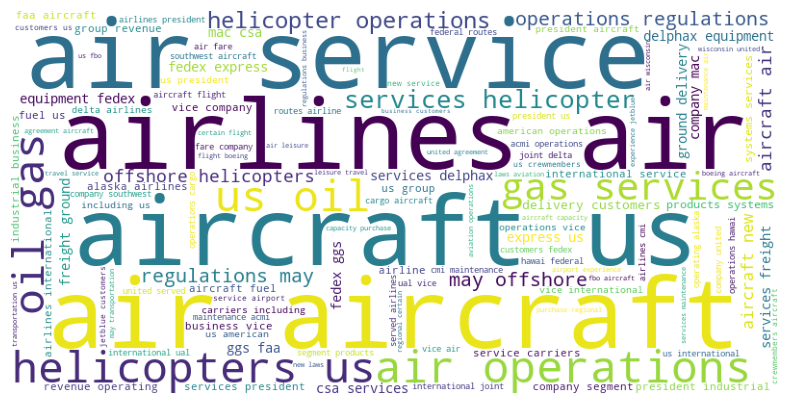

In [15]:
# convert series to a string
keyword_str_wordcount = ' '.join(merge_df['top keywords_wordcount'].tolist())

# lower max_font_size
wordcloud1 = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(keyword_str_wordcount) # note that text is a string, not a list

# plot the WordCloud image
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud1)
plt.savefig('keyword_all.png') # save as PNG file
plt.show()

##### Create wordcould from column 'top keywords_tfidf'

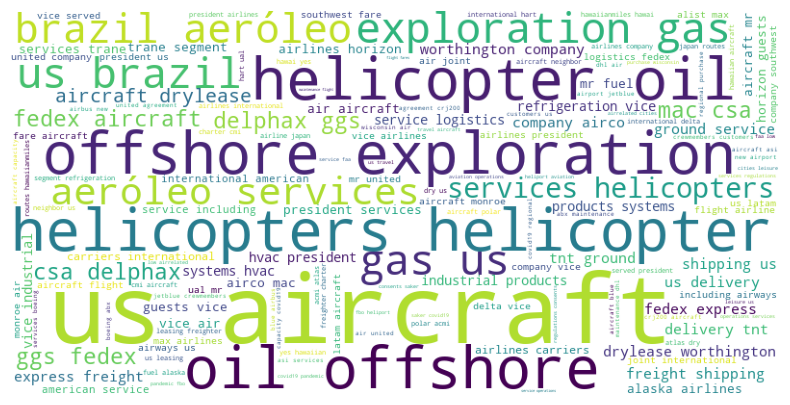

In [16]:
# convert series to a string
keyword_str_tfidf = ' '.join(merge_df['top keywords_tfidf'].tolist())

# lower max_font_size
wordcloud1 = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(keyword_str_tfidf) # note that text is a string, not a list

# plot the WordCloud image
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud1)
plt.savefig('keyword_all.png') # save as PNG file
plt.show()

#### **(e.) Word embedding - Find the most relevant five words for keywords**

1. Import `Gensim` package and impoort `Word2Vec`
2. Train the `Word2Vec` model using column `item_1_clean` that we just created
3. Use `.wv.most_similar()` function to find the most relevant five words for each keyword

<table><tr><td bgcolor=#F0F0F0>Comment : Using models like Word2Vec from the Gensim package, words are embedded as vectors, allowing for mathematical operations that reveal word similarities and relevance.</td></tr></table>

##### Import Gensim package

In [17]:
from gensim.models import Word2Vec

##### Train word2vec model

In [18]:
# use [item_1_clean] for further processing
docs_10K = [row.split() for row in _10K_df['item_1_clean']]

# training word2vec model
model = Word2Vec(docs_10K, min_count=5, vector_size=50, workers=3, window=5, sg = 1)

# save the model for future use
model.save("word2vec.model")

# load model from stored file
model = Word2Vec.load("word2vec.model")

##### Print out the most relevant five words for `helicopters`

In [19]:
helicopters_similar = model.wv.most_similar('helicopters')

# Sort by the second element (the similarity score) in descending order
sorted_helicopters = sorted(helicopters_similar, key=lambda x: x[1], reverse=True)


print("The most relevant five words for 'helicopters' is:")
for i in sorted_helicopters[:5]:
    print(i[0])

The most relevant five words for 'helicopters' is:
takeoff
aircraft
unmanned
freighter
aw189


##### Print out the most relevant five words for `aircraft`

In [20]:
aircraft_similar = model.wv.most_similar('aircraft')

# Sort by the second element (the similarity score) in descending order
sorted_aircraft = sorted(aircraft_similar, key=lambda x: x[1], reverse=True)

print("The most relevant five words for 'aircraft' is:")
for i in sorted_aircraft[:5]:
    print(i[0])

The most relevant five words for 'aircraft' is:
airframe
unmanned
freighter
linefit
fighter


##### Print out the most relevant five words for `service`

In [21]:
service_similar = model.wv.most_similar('service')

# Sort by the second element (the similarity score) in descending order
sorted_service = sorted(service_similar, key=lambda x: x[1], reverse=True)

print("The most relevant five words for 'service' is:")
for i in sorted_service[:5]:
    print(i[0])

The most relevant five words for 'service' is:
aftersales
postsale
keysightcare
postwarranty
videoconferences
